In [1]:
import os
import shutil
import pandas as pd
import numpy as np

In [2]:
# unzip file
#zip_path = 'Data/bbc-fulltext.zip'
#shutil.unpack_archive(zip_path, 'Data/BbcFolder')

In [3]:
classtext = list()
content = list()

In [4]:
listFolder = os.listdir('Data/BbcFolder/bbc')
listFolder.remove('README.TXT')
listFolder

['business', 'entertainment', 'politics', 'sport', 'tech']

In [5]:
# đọc nội dung của các file text
for folder in listFolder:
    for file in os.listdir(f'Data/BbcFolder/bbc/{folder}'):   
        fileName = f'Data/BbcFolder/bbc/{folder}/{file}'
        f = open(fileName, 'r')
        strND = f.read()
        content.append(strND)
        classtext.append(folder)
        f.close()

In [6]:
print(len(content))
print(len(classtext))

2225
2225


In [7]:
# tạo dataframe lưu trữ nội dung các file
data = pd.DataFrame({
    'Id': list(range(0,len(classtext))),
    'Content': content,
    'ClassName': classtext
})
data.set_index('Id', inplace= True)

In [8]:
data['Content'][0][:200]

'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one '

In [9]:
# Thực hiện xử lý làm sạch dữ liệu
data['text_clean'] = data['Content'].str.replace('[^a-zA-Z]',' ', regex=True)
data['text_clean'] = data['text_clean'].str.lower()
data['text_clean'] = data['text_clean'].str.replace('\s+',' ', regex = True)
data['text_clean'][0][:200]

'ad sales boost time warner profit quarterly profits at us media giant timewarner jumped to bn m for the three months to december from m year earlier the firm which is now one of the biggest investors '

In [10]:
# Vẽ word_cloud

In [11]:
BusinessTextDf = data.loc[data['ClassName'] == 'business', ['text_clean', 'ClassName']]
EntertainmentTextDf = data.loc[data['ClassName'] == 'entertainment', ['text_clean', 'ClassName']]
PoliticsTextDf = data.loc[data['ClassName'] == 'politics', ['text_clean', 'ClassName']]
SportTextDf = data.loc[data['ClassName'] == 'sport', ['text_clean', 'ClassName']]
TechTextDf = data.loc[data['ClassName'] == 'tech', ['text_clean', 'ClassName']]

In [12]:
# Tạo biến lưu trữ nội dung để vẽ word_cloud
BusinessText = BusinessTextDf.groupby('ClassName')['text_clean'].agg(','.join)
BusinessText = ','.join(BusinessText)
EntertainmentText = EntertainmentTextDf.groupby('ClassName')['text_clean'].agg(','.join)
EntertainmentText = ','.join(EntertainmentText)
PoliticsText = PoliticsTextDf.groupby('ClassName')['text_clean'].agg(','.join)
PoliticsText = ','.join(PoliticsText)
SportText = SportTextDf.groupby('ClassName')['text_clean'].agg(','.join)
SportText = ','.join(SportText)
TechText = TechTextDf.groupby('ClassName')['text_clean'].agg(','.join)
TechText= ','.join(TechText)

In [13]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [14]:
stopwords = set(STOPWORDS)

In [15]:
add_stopwords = ['will', 'said', 'many', 'people', 'uk', 'year', 'one']

In [16]:
for word in add_stopwords:
    stopwords.add(word)

In [17]:
# Vẽ word_cloud cho những văn bản chủ đề Business
wc =  WordCloud(background_color= 'black',
               max_words=1000,
               stopwords=stopwords) # chọn ra những từ có tần suất xuất hiện nhiều nhất đã loại bỏ ra những từ ko cần thiết
wc.generate(BusinessText)

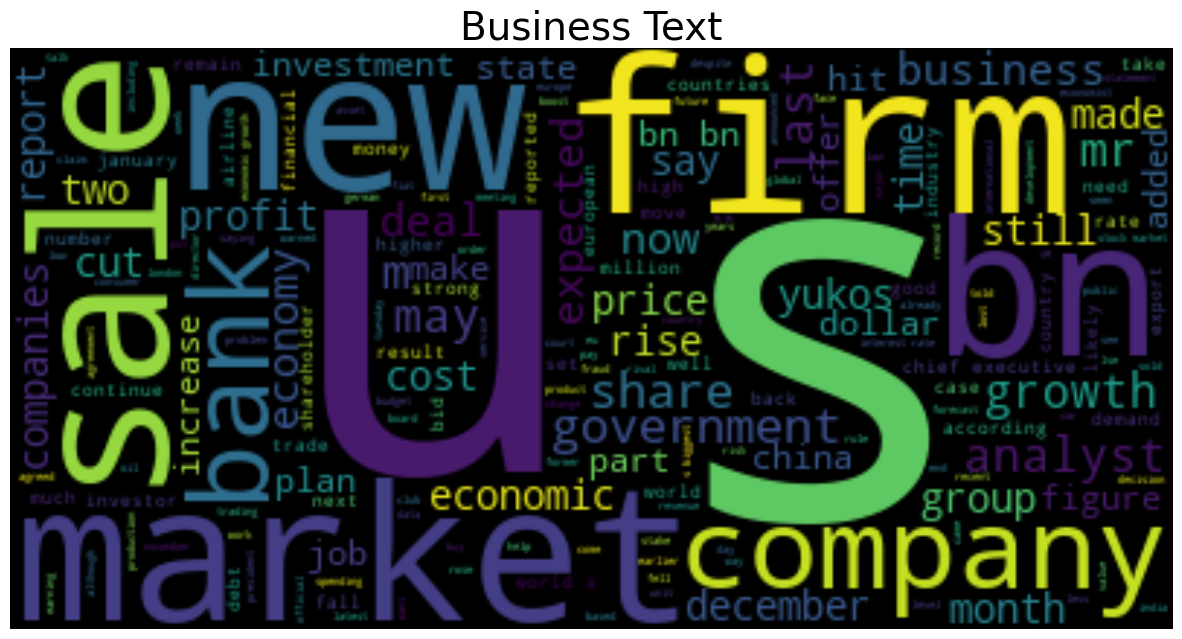

In [18]:
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation= 'bilinear')
plt.title('Business Text', fontsize = 28)
plt.axis('off')
plt.show()

In [19]:
# # Vẽ word_cloud cho những văn bản chủ đề Entertainment
wc =  WordCloud(background_color= 'black',
               max_words=1000,
               stopwords=stopwords) # chọn ra những từ có tần suất xuất hiện nhiều nhất đã loại bỏ ra những từ ko cần thiết
wc.generate(EntertainmentText)

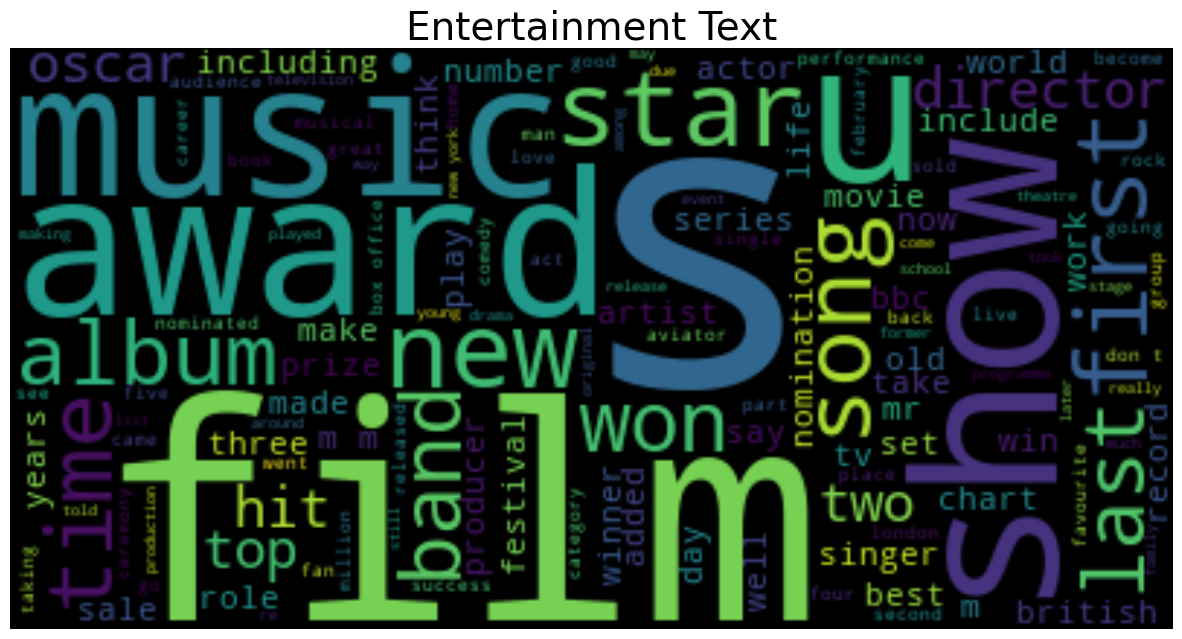

In [20]:
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation= 'bilinear')
plt.title('Entertainment Text', fontsize = 28)
plt.axis('off')
plt.show()

In [21]:
#Vẽ word_cloud cho những văn bản có chủ đề Politic
wc =  WordCloud(background_color= 'black',
               max_words=1000,
               stopwords=stopwords) # chọn ra những từ có tần suất xuất hiện nhiều nhất đã loại bỏ ra những từ ko cần thiết
wc.generate(PoliticsText)

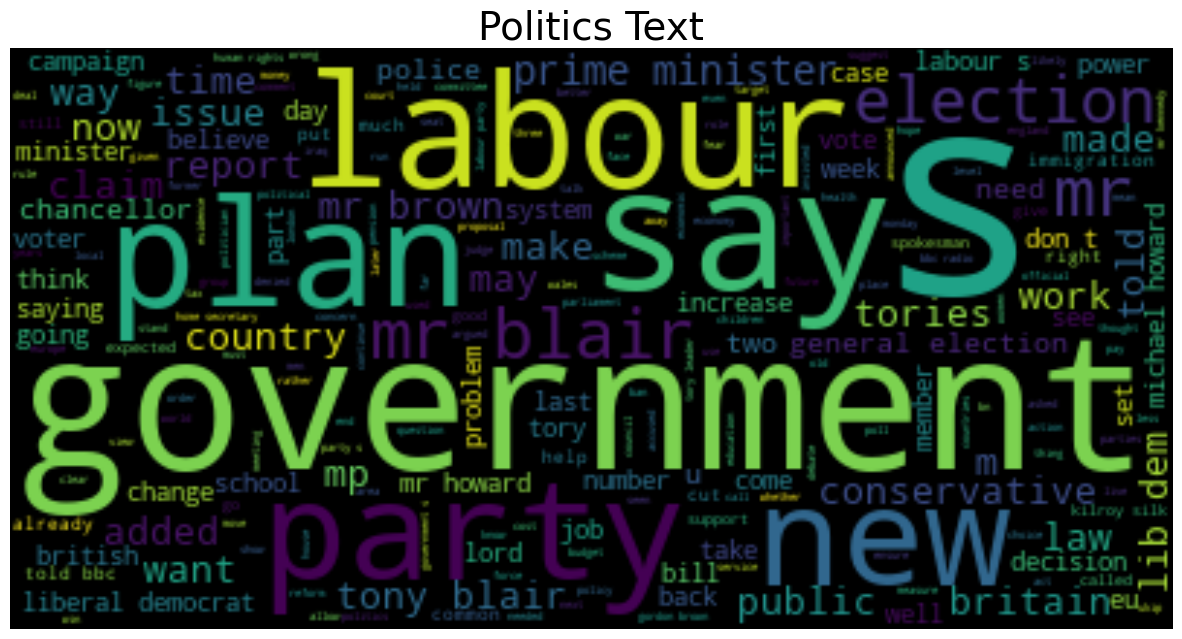

In [22]:
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation= 'bilinear')
plt.title('Politics Text', fontsize = 28)
plt.axis('off')
plt.show()

In [23]:
# Vẽ word_cloud cho những văn bản có chủ đề Sport
wc =  WordCloud(background_color= 'black',
               max_words=1000,
               stopwords=stopwords) # chọn ra những từ có tần suất xuất hiện nhiều nhất đã loại bỏ ra những từ ko cần thiết
wc.generate(SportText)

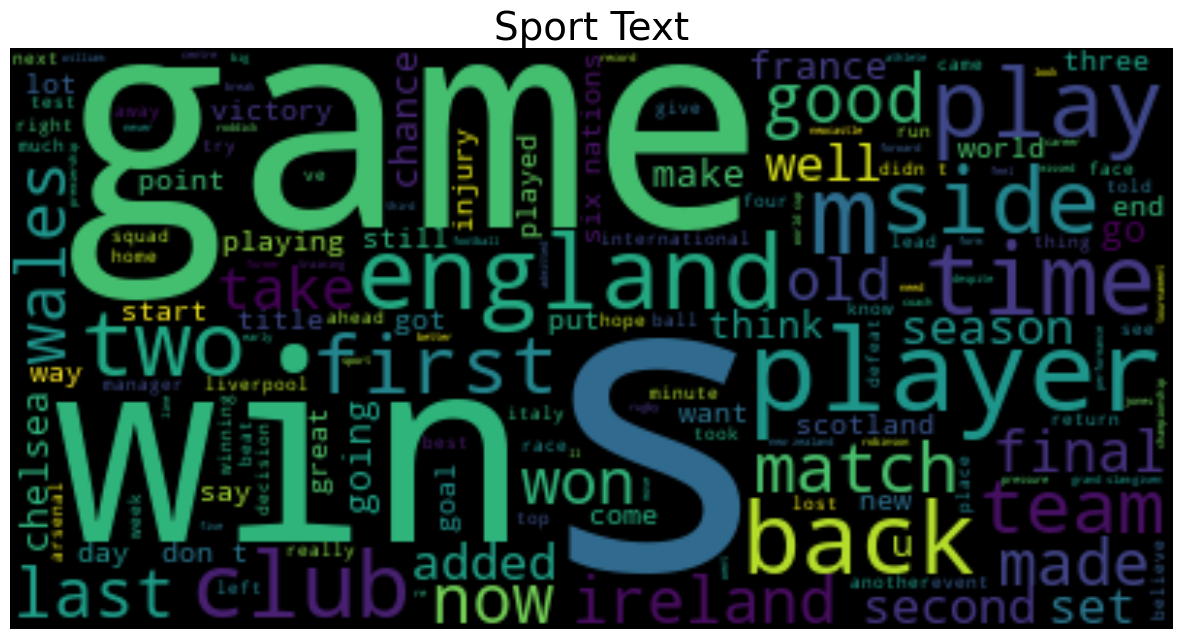

In [24]:
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation= 'bilinear')
plt.title('Sport Text', fontsize = 28)
plt.axis('off')
plt.show()

In [25]:
#Vẽ word_cloud cho những văn bản có chủ đề Tech
wc =  WordCloud(background_color= 'black',
               max_words=1000,
               stopwords=stopwords) # chọn ra những từ có tần suất xuất hiện nhiều nhất đã loại bỏ ra những từ ko cần thiết
wc.generate(TechText)

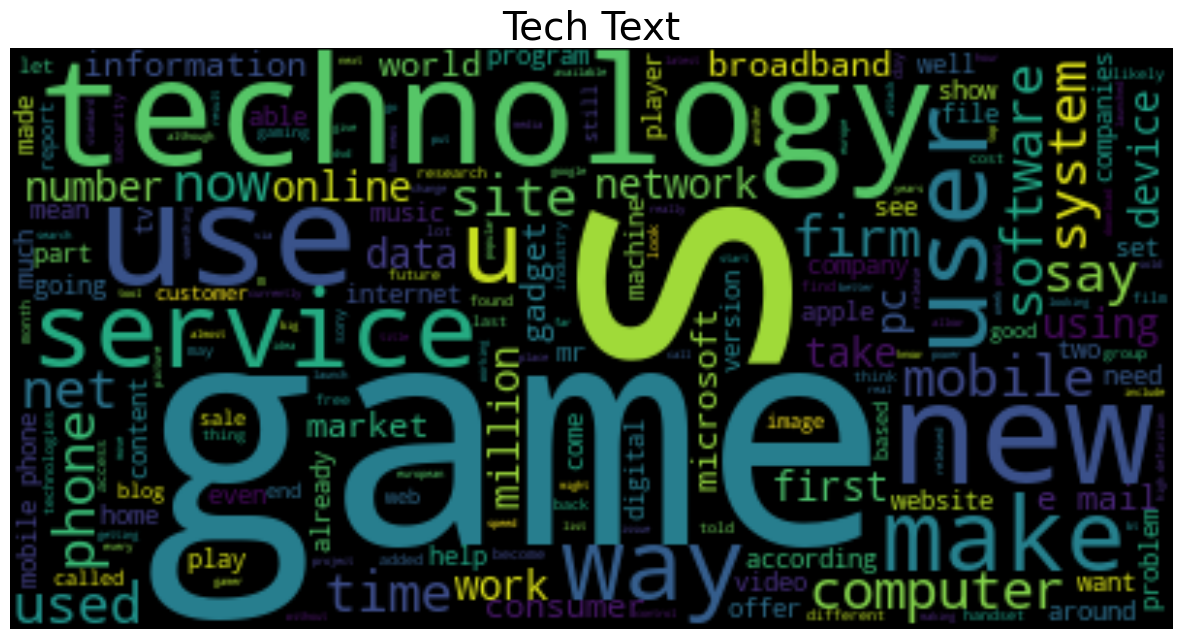

In [26]:
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation= 'bilinear')
plt.title('Tech Text', fontsize = 28)
plt.axis('off')
plt.show()

In [27]:
# Thực hiện data engineering

In [28]:
data['char_count'] = data['text_clean'].str.len()
data['word_count'] = data['text_clean'].str.split(' ').str.len()
data['avg_word_length'] = data['char_count']/data['word_count']

In [29]:
data = data.loc[:, ]

In [30]:
import seaborn as sns

In [31]:
# Kiểm tra độ lệch phải của các thuộc tính
columns = ['char_count' , 'word_count', 'avg_word_length']
for column in columns:
    print('Skew of column', column, data[column].skew())

Skew of column char_count 5.637419725243735
Skew of column word_count 5.989387961875073
Skew of column avg_word_length -0.10068606297251881


In [32]:
# Thực hiện giảm độ lệch phải cho các thuộc tính bị lệch
data['char_count'] = np.log1p(data['char_count'])
data['word_count'] = np.log1p(data['word_count'])

In [33]:
# Thực hiện tf_idf (Xây dựng DataFrame với các giá trị là trọng số của các từ)
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tf_idf = TfidfVectorizer(max_features=200, stop_words='english') #max_features=200 -> chọn 200 từ quan trọng nhất 
tf_transform = tf_idf.fit_transform(data['text_clean'])
tf_transform = tf_transform.toarray()
tf_transform = pd.DataFrame(tf_transform, columns=tf_idf.get_feature_names_out())
tf_transform.head()

,able,according,action,added,anti,award,awards,away,bank,based,...,wales,want,way,week,win,won,work,world,year,years
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.072154,0.0,0.0,0.0,0.0,0.000000,0.195031,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.159266,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.069508,0.0
2,0.0,0.0,0.178197,0.0,0.0,0.0,0.0,0.0,0.000000,0.160242,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.184924,0.0,0.0,0.0,0.0,0.084652,0.374887,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.068643,0.0


In [35]:
# Xem những từ có trọng số cao nhất của đoạn văn 1
tf_transform.iloc[0].sort_values(ascending = False).head(10)

bn          0.436290
internet    0.431477
sales       0.406156
year        0.195031
film        0.192630
deal        0.192140
europe      0.189984
time        0.179097
said        0.174608
high        0.169463
Name: 0, dtype: float64

In [36]:
final_data = pd.concat([tf_transform, data], axis = 1)
final_data.drop('text_clean', axis = 1, inplace= True)
final_data.drop('Content', axis = 1, inplace= True)

In [44]:
final_data.drop('text_clean', axis = 1, inplace= True)
final_data.drop('Content', axis = 1, inplace= True)

In [37]:
# Chuẩn hóa dữ liệu theo MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [38]:
def output_transform(x):
    if 'business' in x:
        return 0
    elif 'entertainment' in x:
        return 1
    elif 'politics' in x:
        return 2
    elif 'sport' in  x:
        return 3
    else:
        return 4

In [39]:
final_data['ClassName'] = final_data['ClassName'].apply(output_transform)

In [40]:
final_data['ClassName'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [41]:
final_data

,able,according,action,added,anti,award,awards,away,bank,based,...,win,won,work,world,year,years,ClassName,char_count,word_count,avg_word_length
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.195031,0.000000,0,7.784889,6.047372,5.694313
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.159266,0.000000,...,0.0,0.0,0.000000,0.000000,0.069508,0.000000,0,7.691200,5.978886,5.553299
2,0.000000,0.000000,0.178197,0.0,0.0,0.0,0.0,0.000000,0.000000,0.160242,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,7.315884,5.602119,5.566667
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.084652,0.374887,0.000000,0,7.702104,5.983936,5.585859
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.068643,0.000000,0,7.305188,5.590987,5.569288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.096596,0.000000,0.099455,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,4,7.806289,6.061457,5.735981
2221,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.062561,0.000000,0.000000,4,7.697121,5.883322,6.148045
2222,0.000000,0.049518,0.055528,0.0,0.0,0.0,0.0,0.000000,0.000000,0.049933,...,0.0,0.0,0.000000,0.037644,0.055570,0.000000,4,8.725670,6.969791,5.793039
2223,0.000000,0.000000,0.082519,0.0,0.0,0.0,0.0,0.000000,0.000000,0.148409,...,0.0,0.0,0.207405,0.000000,0.082581,0.000000,4,7.724005,5.948035,5.918848


In [42]:
y = final_data['ClassName']
X = final_data.drop('ClassName', axis=1)

In [43]:
mm = MinMaxScaler()
X_scale_array = mm.fit_transform(X)
X_scale = pd.DataFrame(X_scale_array, columns = X.columns)
X_scale

,able,according,action,added,anti,award,awards,away,bank,based,...,week,win,won,work,world,year,years,char_count,word_count,avg_word_length
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.314404,0.000000,0.404638,0.392829,0.502642
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.177631,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.112052,0.000000,0.380742,0.375194,0.421156
2,0.000000,0.000000,0.238663,0.0,0.0,0.0,0.0,0.000000,0.000000,0.318092,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.285011,0.278179,0.428881
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.114133,0.604343,0.000000,0.383523,0.376495,0.439971
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.110657,0.000000,0.282283,0.275313,0.430396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.231859,0.000000,0.133202,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.410097,0.396456,0.526721
2221,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.084348,0.000000,0.000000,0.382252,0.350587,0.764836
2222,0.000000,0.121372,0.074370,0.0,0.0,0.0,0.0,0.000000,0.000000,0.099121,...,0.000000,0.0,0.0,0.000000,0.050754,0.089582,0.000000,0.644599,0.630347,0.559692
2223,0.000000,0.000000,0.110520,0.0,0.0,0.0,0.0,0.000000,0.000000,0.294603,...,0.135343,0.0,0.0,0.284498,0.000000,0.133127,0.000000,0.389109,0.367251,0.632393


In [44]:
# Tiến hành xây dựng model

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scale,y, random_state= 0, test_size = 0.2)

In [47]:
X.shape, X_train.shape, y_train.shape

((2225, 203), (1780, 203), (1780,))

In [48]:
# Thực hiện LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [49]:
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
yhat_train = model.predict(X_train)

In [51]:
yhat_train[0:5]

array([1, 3, 4, 2, 3], dtype=int64)

In [52]:
y_train[0:5]

841     1
1748    3
2118    4
1174    2
1502    3
Name: ClassName, dtype: int64

In [53]:
yhat_test = model.predict(X_test)

In [54]:
# Xem giá trị R^2 của tập train
print("Accuracy Of Train Is: ",model.score(X_train,y_train))

Accurancy Of Train Is:  0.9837078651685394


In [55]:
# Xem giá trị R^2 của tập test
print("Accuracy Of Test Is: ",model.score(X_test,  y_test))

Accurancy Of Test Is:  0.9325842696629213


In [56]:
from sklearn.metrics import classification_report as rp

In [57]:
print('Classification Report')
print('-'*80)
print(rp(y_test, yhat_test))

Classification Report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       111
           1       0.92      0.92      0.92        74
           2       0.94      0.93      0.94        86
           3       0.96      0.96      0.96       108
           4       0.90      0.92      0.91        66

    accuracy                           0.93       445
   macro avg       0.93      0.93      0.93       445
weighted avg       0.93      0.93      0.93       445



In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
cm = confusion_matrix(y_test, yhat_test)

In [60]:
print('Confusion_Matrix\n')
print(cm)

Confusion_Matrix

[[102   3   2   0   4]
 [  1  68   2   2   1]
 [  3   0  80   1   2]
 [  0   3   1 104   0]
 [  4   0   0   1  61]]


In [61]:
# Thực hiện SVC

In [62]:
from sklearn import svm

In [63]:
svc_model = svm.SVC(gamma = 0.001, C = 100)

In [65]:
svc_model.fit(X_train, y_train)

SVC(C=100, gamma=0.001)

In [66]:
y_pred = svc_model.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import classification_report as rp
print("Svc model accuracy is: ", acc(y_test, y_pred))

Svc model accuracy is:  0.9258426966292135


In [96]:
# Thực hiện Adaboost cho model logistic Regression
from sklearn.ensemble import AdaBoostClassifier

In [104]:
m1 = LogisticRegression()
clf = AdaBoostClassifier(n_estimators = 200,
                           base_estimator = m1,
                           learning_rate = 1)

In [105]:
Adaboost_model = clf.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [108]:
R_cross = cross_val_score(Adaboost_model, X_test, y_test)
print('Adaboost Acc is: ', R_cross.max())

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Adaboost Acc is:  0.9213483146067416


__Nhận xét__

Qua 3 lần thực hiện xây dựng model với thuật toán LogisticRegression, Thuật toán SVC của SVM, thuật toán AdaBoost sử dụng cho thuật toán Logistic Regression. Nhận thấy cả 3 thuật toán được liệt kê ở trên đều cho kết quả accuracy trên tập test là 93% mặc dù đã sử dụng Adaboost cho thuật toán Logistic nhưng độ chính xác vẫn là 93%. Vì vậy chọn model LogisticRegression là model chinh thức vì tốc độ xử lý nhanh hơn và cho độ chính xác tương tự như 2 model đã được liệt kê ở trên